# **Proyecto: Análisis de Datos de Ventas para la Toma de Decisiones Comerciales**

# **Contexto**
El sector minorista, especialmente los supermercados, generan una gran cantidad de datos a partir de las ventas diarias de productos, categorías, precios y cantidades. Sin embargo, el simple hecho de contar con estos datos no asegura que se puedan tomar buenas decisiones si no se los analiza de manera adecuada.

En muchos casos, las decisiones comerciales como el manejo del stock, la fijación de precios o la elección de qué categorías priorizar se toman sin analizar en profundidad el comportamiento real de las ventas. Esto puede provocar problemas como falta o exceso de stock, oportunidades de mejora no detectadas o una menor eficiencia en los ingresos del negocio

# **Problemática a resolver**
Este proyecto tiene como objetivo analizar los datos de ventas de un supermercado para entender cómo se distribuyen las ventas entre los distintos productos y categorías, identificar patrones importantes y observar posibles tendencias en el comportamiento de consumo.

A partir de este análisis, se busca obtener información útil que ayude a mejorar la toma de decisiones comerciales y que sirva como punto de partida para un análisis más detallados en etapas posteriores.

# **Preguntas**

A partir de la problemática planteada, se definen las siguientes preguntas de interés para el análisis de los datos:

1. ¿Qué productos registran mayores ventas totales dentro del período analizado?
2. ¿Qué categorías concentran la mayor parte de las ventas del supermercado?
3. ¿Existen diferencias significativas en las ventas entre las distintas categorías de productos?
4. ¿Se observan patrones o tendencias en el comportamiento de las ventas a lo largo del tiempo?

# **Importación de Data**

**Importacion de Librerias**

In [26]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#Cargamos el archivo
!gdown 14jZT0DIT3kvx8o_HoMHY9kgmjShD_hmQH99KlDS6h3A

Downloading...
From (original): https://drive.google.com/uc?id=14jZT0DIT3kvx8o_HoMHY9kgmjShD_hmQH99KlDS6h3A
From (redirected): https://docs.google.com/spreadsheets/d/14jZT0DIT3kvx8o_HoMHY9kgmjShD_hmQH99KlDS6h3A/export?format=xlsx
To: /content/Dataset_Carrefour.xlsx
1.04MB [00:00, 90.1MB/s]


# **Visualización del Dataset**

In [3]:
df = pd.read_excel('Dataset_Carrefour.xlsx')
df.head()

,ID_compra,ID_producto,Nombre_producto,Marca,Categoria,Fecha,ID_ tienda,Nombre _tienda,Tipo_tienda,Provincia_tienda,...,ID_cliente,Promocion_aplicada,Proveedor,Stock_antes,Stock_despues,Precio_unitario_con_impuesto,Precio_unitario_sin_impuesto,Tipo_unidad,Precio_paquete_con_impuesto,Precio_paquete_sin_impuesto
0,1,1448,Jugo de Naranja x 500 g,Molinos,Panificados,2021-01-04,1,Carrefour Belgrano,Hiper,Buenos Aires,...,21737,No,Proveedor A,179,171,3033.64,2507.14,unidad,24269.12,20057.12
1,2,1144,Shampoo x 500 g,Quilmes,Pastas,2021-01-04,1,Carrefour Belgrano,Hiper,Buenos Aires,...,15560,Sí,Proveedor A,219,212,1745.62,1442.66,unidad,10473.72,8655.97
2,3,1103,Manteca x 6 unidades,Coca-Cola,Bebidas,2021-01-05,1,Carrefour Belgrano,Hiper,Buenos Aires,...,13807,Sí,Proveedor A,452,451,1266.38,1046.60,litro,7598.28,6279.57
3,4,1304,Queso Cremoso x 1 kg,Quilmes,Pastas,2021-01-05,1,Carrefour Belgrano,Hiper,Buenos Aires,...,79917,Sí,Proveedor B,175,169,2373.10,1961.24,kilo,21357.90,17651.16
4,5,1708,Gaseosa Cola x 900 ml,Procter & Gamble,Almacén,2021-01-06,1,Carrefour Belgrano,Hiper,Buenos Aires,...,33980,No,Proveedor B,279,273,2425.78,2004.78,paquete,14554.68,12028.66


**Información general y tipos de datos**

* tipos de variables
* presencia de valores nulos
* posibles problemas de formato

In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_compra                     8100 non-null   int64  
 1   ID_producto                   8100 non-null   int64  
 2   Nombre_producto               8100 non-null   object 
 3   Marca                         8100 non-null   object 
 4   Categoria                     8100 non-null   object 
 5   Fecha                         8100 non-null   object 
 6   ID_ tienda                    8100 non-null   int64  
 7   Nombre _tienda                8100 non-null   object 
 8   Tipo_tienda                   8100 non-null   object 
 9   Provincia_tienda              8100 non-null   object 
 10  Precio                        8100 non-null   float64
 11  Cantidad                      8100 non-null   int64  
 12  Valor_total                   8100 non-null   float64
 13  Met

**Dimensión del dataset**

In [5]:
# Cantidad de filas y columnas
df.shape

(8100, 24)

**Valores nulos**

In [6]:
# Cantidad de valores nulos por columna
df.isnull().sum()

,0
ID_compra,0
ID_producto,0
Nombre_producto,0
Marca,0
Categoria,0
Fecha,0
ID_ tienda,0
Nombre _tienda,0
Tipo_tienda,0
Provincia_tienda,0


**Estadísticas descriptivas**

In [7]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,ID_compra,ID_producto,ID_ tienda,Precio,Cantidad,Valor_total,ID_cliente,Stock_antes,Stock_despues,Precio_unitario_con_impuesto,Precio_unitario_sin_impuesto,Precio_paquete_con_impuesto,Precio_paquete_sin_impuesto
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.00000,8100.000000,8100.000000
mean,4050.500000,1503.384691,2.466420,2737.206979,5.448148,14852.794311,54818.054074,278.151975,272.703827,2737.206979,2262.15448,24796.643909,20493.094136
std,2338.412923,287.916897,1.123988,1305.609769,2.848940,11075.322806,26007.205390,129.235336,129.271678,1305.609769,1079.01640,13356.488597,11038.420219
min,1.000000,1000.000000,1.000000,500.970000,1.000000,503.850000,10017.000000,50.000000,40.000000,500.970000,414.02000,3023.100000,2498.430000
25%,2025.750000,1258.000000,1.000000,1592.830000,3.000000,5808.640000,32113.250000,168.000000,163.000000,1592.830000,1316.39000,13798.290000,11403.550000
50%,4050.500000,1504.000000,2.000000,2735.080000,5.000000,11967.080000,54682.500000,279.000000,273.000000,2735.080000,2260.39500,23368.575000,19312.870000
75%,6075.250000,1749.000000,3.000000,3877.650000,8.000000,21842.660000,77373.000000,392.000000,386.000000,3877.650000,3204.67000,34171.610000,28241.000000
max,8100.000000,1999.000000,4.000000,4999.580000,10.000000,49961.800000,99970.000000,500.000000,498.000000,4999.580000,4131.88000,59994.120000,49581.920000


**Registros duplicados**

In [8]:
# Verificar filas duplicadas
df.duplicated().sum()

np.int64(0)

**Valores únicos por columna**

In [9]:
# Cantidad de valores únicos
df.nunique()

,0
ID_compra,8100
ID_producto,998
Nombre_producto,160
Marca,10
Categoria,7
Fecha,3480
ID_ tienda,4
Nombre _tienda,11
Tipo_tienda,3
Provincia_tienda,4


In [11]:
# Visualizar nombres de columnas
df.columns

Index(['ID_compra', 'ID_producto', 'Nombre_producto', 'Marca', 'Categoria',
       'Fecha', 'ID_ tienda', 'Nombre _tienda', 'Tipo_tienda',
       'Provincia_tienda', 'Precio', 'Cantidad', 'Valor_total', 'Metodo_pago',
       'ID_cliente', 'Promocion_aplicada', 'Proveedor', 'Stock_antes',
       'Stock_despues', 'Precio_unitario_con_impuesto',
       'Precio_unitario_sin_impuesto', 'Tipo_unidad',
       'Precio_paquete_con_impuesto', 'Precio_paquete_sin_impuesto'],
      dtype='object')

A partir de estos comandos descriptivos, se obtiene una visión general del dataset, lo que permite entender cómo están organizados los datos, detectar si existen valores faltantes y conocer las características básicas de las variables. Esta revisión inicial es importante para asegurarse de que los datos estén en buenas condiciones antes de avanzar con los gráficos y el análisis.


### **Gráficos con Matplotlib**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

**Gráfico 1: Ventas totales por categoría (barras)**

Responde a: ¿Qué categorías venden más?

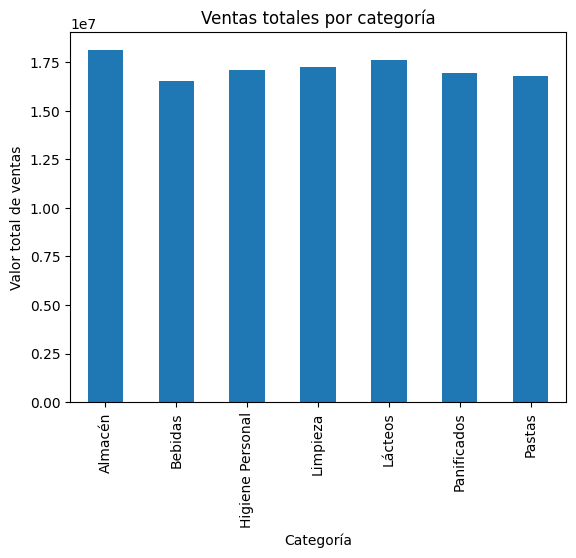

In [12]:
ventas_categoria = df.groupby('Categoria')['Valor_total'].sum()

plt.figure()
ventas_categoria.plot(kind='bar')
plt.title('Ventas totales por categoría')
plt.xlabel('Categoría')
plt.ylabel('Valor total de ventas')
plt.show()

Este gráfico muestra cómo se distribuyen las ventas totales entre las distintas categorías.
Permite identificar cuáles tienen mayor peso en el total de ventas y cuáles presentan un menor nivel de participación.



**Gráfico 2: Top 10 productos con mayores ventas (barras horizontales)**

Responde a: ¿Qué productos generan más ventas?

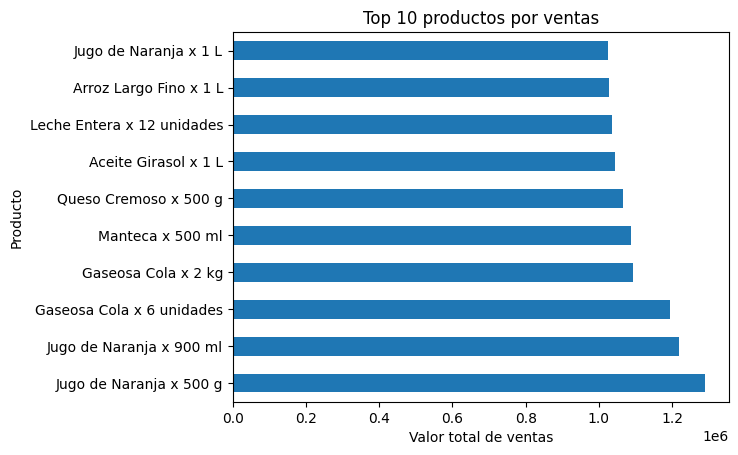

In [13]:
top_productos = (
    df.groupby('Nombre_producto')['Valor_total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_productos.plot(kind='barh')
plt.title('Top 10 productos por ventas')
plt.xlabel('Valor total de ventas')
plt.ylabel('Producto')
plt.show()

El gráfico muestra los diez productos con mayores ventas totales.
Esto ayuda a identificar los productos clave del supermercado, que pueden ser estratégicos para acciones comerciales o de stock.

**Gráfico 3: Distribución de ventas (histograma)**

Responde a las siguientes preguntas:
- ¿Cómo se distribuyen las ventas?
- ¿Hay muchas ventas chicas o pocas ventas grandes?

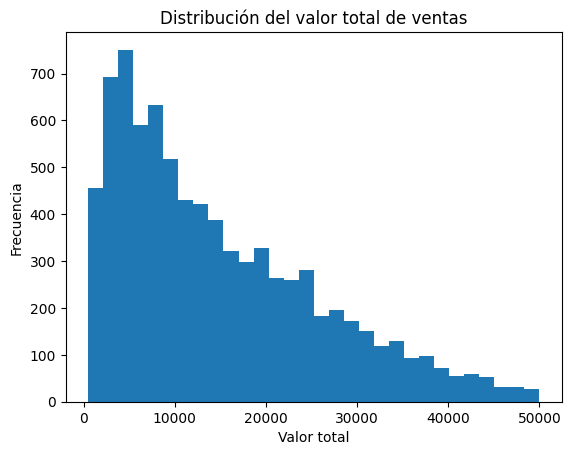

In [14]:
plt.figure()
plt.hist(df['Valor_total'], bins=30)
plt.title('Distribución del valor total de ventas')
plt.xlabel('Valor total')
plt.ylabel('Frecuencia')
plt.show()


Este histograma permite observar cómo se distribuyen los valores de venta.
Se puede identificar si predominan ventas de bajo monto o si existen operaciones
de mayor valor que influyen en el total.

## **PARTE B — Gráficos con Seaborn**

**Gráfico 4: Boxplot de ventas por categoría**

Responde a: ¿Qué categorías tienen más variabilidad en las ventas?

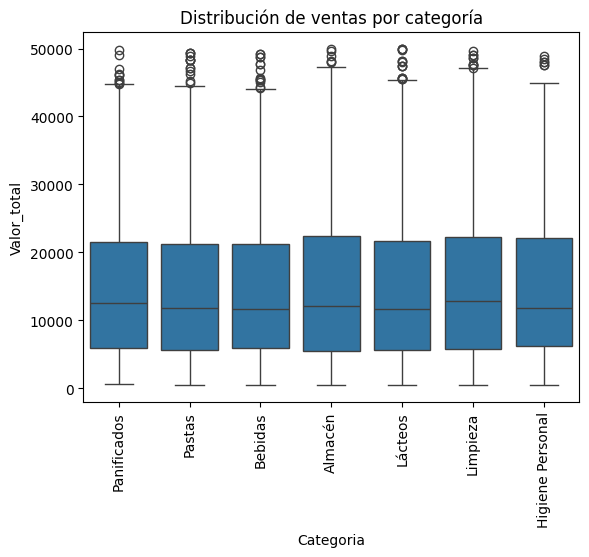

In [15]:
plt.figure()
sns.boxplot(x='Categoria', y='Valor_total', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de ventas por categoría')
plt.show()


Este gráfico muestra la variabilidad de las ventas dentro de cada categoría.
Permite detectar diferencias en el comportamiento de las ventas y la presencia
de valores que se alejan del promedio.

**Gráfico 5: Relación entre cantidad vendida y valor total (scatter)**

Responde a: ¿Vender más cantidad siempre implica mayor valor de venta?

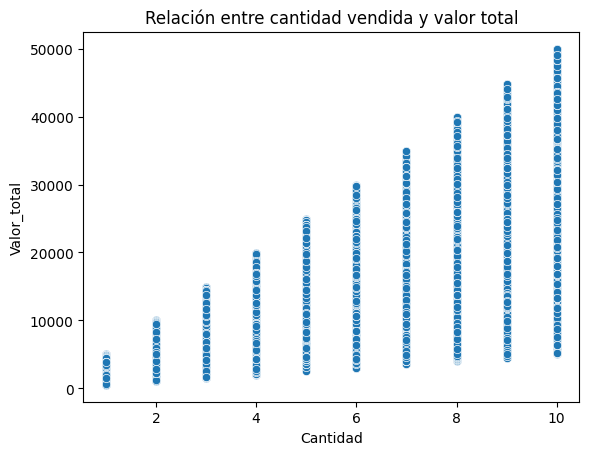

In [16]:
plt.figure()
sns.scatterplot(x='Cantidad', y='Valor_total', data=df)
plt.title('Relación entre cantidad vendida y valor total')
plt.show()

El gráfico muestra la relación entre la cantidad de productos vendidos y el valor total de la venta.
Permite analizar si un mayor volumen de unidades vendidas se traduce necesariamente en un mayor ingreso.


**Gráfico 6: Heatmap de correlaciones**

Responde a:
¿Qué variables están relacionadas entre sí?


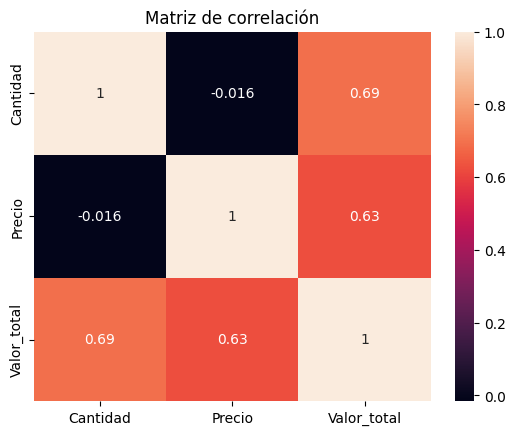

In [17]:
plt.figure()
sns.heatmap(df[['Cantidad', 'Precio', 'Valor_total']].corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()


Este gráfico permite analizar la relación entre las principales variables numéricas del dataset.
Ayuda a comprender qué factores tienen mayor influencia sobre el valor total de las ventas.

## **Insights y conclusiones**

A partir del análisis descriptivo y de los gráficos realizados, se pudo obtener varios insights relevantes sobre el comportamiento de las ventas del supermercado.

En primer lugar, se observa que no todas las categorías aportan el mismo nivel de ventas, ya que algunas concentran una mayor parte del valor total vendido. Esto indica que existen categorías clave que tienen un mayor impacto en los resultados del negocio.

Por otro lado, el análisis por producto muestra que un grupo reducido de productos genera la mayor parte de las ventas totales, mientras que muchos otros presentan un aporte menor. Esto sugiere que identificar y gestionar correctamente estos productos principales puede ser fundamental para mejorar la performance comercial.

Además, al analizar la relación entre la cantidad vendida y el valor total de las ventas, se observa que vender más unidades no siempre implica mayores ingresos, ya que el precio del producto juega un rol importante en el resultado final.

Finalmente, el análisis de la distribución y la variabilidad de las ventas permite detectar diferencias entre categorías y posibles valores atípicos, lo que abre la posibilidad de profundizar en futuros análisis para entender las causas de estos comportamientos.

En conclusión, el análisis brinda una visión general del desempeño de las ventas y sirve como base para la toma de decisiones comerciales, como tambien para el desarrollo de análisis más avanzados en etapas posteriores del proyecto.



# **Etapa de Pre-entrega (resumen y mejoras)**

En la pre-entrega se hizo el análisis exploratorio del dataset: se revisaron columnas, tipos de datos,
valores faltantes, estadísticas básicas y se crearon gráficos para entender las ventas.

Gracias a esta etapa, sabemos qué variables son importantes y qué columnas son categóricas (texto).
Por eso, antes de entrenar un modelo, preparamos los datos para que el algoritmo los pueda entender.

# **Preprocesamiento + Encoding (CODIFICACIÓN)**

Cabe destacar que los modelos de aprendizaje automático no trabajan bien con texto (por ejemplo: "Efectivo", "Visa", "Almacén").
Entonces vamos a transformar esas categorías a números.

Para hacerlo de forma ordenada, se usa un método llamado One-Hot Encoding, que crea columnas nuevas
(0/1) para representar cada categoría. También se va a controlar valores faltantes para evitar errores.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# **Selección de variables (X e y)**

Se define lo que se va a predecir (variable objetivo). En este caso: el
`Valor_total` de una venta, es un número. Por eso el proyecto es de REGRESIÓN (no clasificación).

Luego se elige las variables que que influyen en ese valor, como:
- Precio y Cantidad
- Categoría, Marca, tipo de tienda, método de pago, etc.

Estas variables son las "entradas" del modelo (X).

In [20]:
# Variable objetivo (lo que queremos predecir)
y = df['Valor_total']

# Variables predictoras (lo que usamos para predecir)
X = df[['Precio', 'Cantidad', 'Categoria', 'Marca', 'Tipo_tienda',
        'Provincia_tienda', 'Metodo_pago', 'Promocion_aplicada']]

# **Separación en entrenamiento y prueba (Train/Test)**

Para saber si el modelo funciona, no podemos evaluarlo con los mismos datos con los que entrenó.
Por eso se separa el dataset en dos partes:

- Train: datos para que el modelo "aprenda"
- Test: datos nuevos para probar qué tan bien predice

Vamos a usar 80% para entrenamiento y 20% para prueba.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((6480, 8), (1620, 8))

# **Preparación final de datos (Encoding + faltantes)**

En este paso, dejamos el dataset listo para que el modelo lo pueda usar sin errores.
- Si hay valores faltantes, los completamos con una regla simple.
- Convertimos columnas de texto a números con One-Hot Encoding.

Es importante porque si no hacemos esto, el modelo puede fallar o aprender mal.

In [22]:
# Columnas numéricas y categóricas según tu dataset
num_features = ['Precio', 'Cantidad']
cat_features = ['Categoria', 'Marca', 'Tipo_tienda', 'Provincia_tienda', 'Metodo_pago', 'Promocion_aplicada']

# Transformaciones para numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Transformaciones para categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Unir transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# **Tipo de problema: Regresión**

Se observa que la variable objetivo `Valor_total` es un número, el tipo de aprendizaje es REGRESIÓN. Se va a entrenar dos modelos de regresión y comparar cuál predice mejor.

# **Entrenamiento del Modelo 1: Regresión Lineal**
Este modelo es un punto de partida. Intenta encontrar una relación "lineal" entre las variables
y el valor total. Es simple, rápido y sirve como base para comparar.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal -> MSE:", mse_lr)
print("Regresión Lineal -> R2:", r2_lr)

Regresión Lineal -> MSE: 13560970.84724624
Regresión Lineal -> R2: 0.89044582353715


# **Entrenamiento del Modelo 2: Random Forest**
Este modelo es más flexible. En lugar de usar una sola fórmula, usa muchos "árboles de decisión"
y combina sus resultados. Suele funcionar mejor cuando los datos tienen relaciones más complejas.

In [24]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest -> MSE:", mse_rf)
print("Random Forest -> R2:", r2_rf)

Random Forest -> MSE: 2243.8648099156276
Random Forest -> R2: 0.999981872628139


# **Comparación de modelos con métricas**
- MSE: mide el error (cuanto más bajo, mejor)
- R²: mide qué tan bien el modelo explica los datos (cuanto más cerca de 1, mejor)

Con estas métricas se puede decidir qué modelo se comporta mejor.

In [25]:
import pandas as pd

comparacion = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R2': [r2_lr, r2_rf]
})

comparacion

,Modelo,MSE,R2
0,Regresión Lineal,1.356097e+07,0.890446
1,Random Forest,2.243865e+03,0.999982


# **Conclusión Final**


En esta etapa del proyecto se entrenó dos modelos de aprendizaje automático para predecir el valor total de una venta: una Regresión Lineal y un modelo de Random Forest. Para compararlos, se utilizaron métricas que permiten evaluar qué tan bien predice cada modelo y qué tan cerca están las predicciones de los valores reales.

En el caso de la Regresión Lineal, el modelo obtuvo un error relativamente alto (MSE ≈ 13.560.970) y un valor de R² cercano a 0,89. Esto indica que, si bien el modelo logra explicar gran parte de los datos, todavía presenta diferencias importantes entre los valores reales y los valores predichos.

Por otro lado, el modelo de Random Forest mostró un desempeño claramente superior, con un error mucho menor (MSE ≈ 2.244) y un R² prácticamente igual a 1 (0,99998). Estos resultados indican que el modelo logra ajustarse de manera mucho más precisa a los datos y predecir el valor total de las ventas con un nivel de error muy bajo.

En conclusión, al comparar ambos modelos, el Random Forest resulta ser el más adecuado para este proyecto, ya que presentó mejores métricas y una mayor capacidad para representar el comportamiento de las ventas. La Regresión Lineal, fue útil como modelo inicial y como punto de comparación, pero el Random Forest demuestra ser la mejor opción para apoyar la toma de decisiones comerciales a partir de los datos analizados.

Como ultima mención, la realización de este proyecto me permitió comprender la importancia de analizar y preparar los datos antes de aplicar modelos de aprendizaje automático. A lo largo del trabajo pude ver cómo, a partir de un análisis exploratorio, es posible tomar mejores decisiones sobre qué variables utilizar y qué modelo aplicar.

Durante el desarrollo del proyecto también utilicé la Inteligencia Artificial como una herramienta de apoyo para aclarar conceptos, ordenar el proceso de trabajo y validar enfoques de análisis. Lo que me permitió agilizar el aprendizaje y mejorar la comprensión de los resultados.

En este sentido, la IA fue un recurso complementario dentro de mi proceso de aprendizaje.